In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)


from scipy import stats
from scipy.stats import norm, skew #for some statistics


pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points


from subprocess import check_output
from sklearn.metrics import r2_score
import statsmodels.api as sm

In [2]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [3]:
data= pd.read_csv("an_dum.csv")

In [4]:
data.columns

Index(['Rating', 'avg_salary', 'hourly', 'employer_provided', 'same_state',
       'age', 'python', 'sas', 'spark', 'aws',
       ...
       'job_state_WI', 'level_higher', 'level_junior', 'level_other',
       'level_senior', 'title_A', 'title_DE', 'title_DS', 'title_mle',
       'title_other'],
      dtype='object', length=177)

In [5]:
data.describe()

,Rating,avg_salary,hourly,employer_provided,same_state,age,python,sas,spark,aws,...,job_state_WI,level_higher,level_junior,level_other,level_senior,title_A,title_DE,title_DS,title_mle,title_other
count,741.000,741.000,741.000,741.000,741.000,741.000,741.000,741.000,741.000,741.000,...,741.000,741.000,741.000,741.000,741.000,741.000,741.000,741.000,741.000,741.000
mean,3.689,101.413,0.032,0.022,0.559,49.807,0.529,0.117,0.225,0.238,...,0.013,0.184,0.012,0.208,0.596,0.142,0.109,0.416,0.088,0.246
std,0.566,37.567,0.177,0.145,0.497,52.275,0.499,0.322,0.418,0.426,...,0.115,0.387,0.110,0.406,0.491,0.349,0.312,0.493,0.283,0.431
min,1.900,15.500,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,3.300,73.500,0.000,0.000,0.000,13.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,3.700,97.500,0.000,0.000,1.000,32.000,1.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000
75%,4.000,122.500,0.000,0.000,1.000,59.000,1.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000
max,5.000,254.000,1.000,1.000,1.000,276.000,1.000,1.000,1.000,1.000,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [6]:
#feature scaling
for col in ['Rating', 'age','desc_len']:
    ma=data[col].max()
    mi=data[col].min()
    data[col]=data[col].apply(lambda x:(x-mi)/(ma-mi))

In [7]:
data.describe()

,Rating,avg_salary,hourly,employer_provided,same_state,age,python,sas,spark,aws,...,job_state_WI,level_higher,level_junior,level_other,level_senior,title_A,title_DE,title_DS,title_mle,title_other
count,741.000,741.000,741.000,741.000,741.000,741.000,741.000,741.000,741.000,741.000,...,741.000,741.000,741.000,741.000,741.000,741.000,741.000,741.000,741.000,741.000
mean,0.577,101.413,0.032,0.022,0.559,0.177,0.529,0.117,0.225,0.238,...,0.013,0.184,0.012,0.208,0.596,0.142,0.109,0.416,0.088,0.246
std,0.183,37.567,0.177,0.145,0.497,0.190,0.499,0.322,0.418,0.426,...,0.115,0.387,0.110,0.406,0.491,0.349,0.312,0.493,0.283,0.431
min,0.000,15.500,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.452,73.500,0.000,0.000,0.000,0.044,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,0.581,97.500,0.000,0.000,1.000,0.113,1.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000
75%,0.677,122.500,0.000,0.000,1.000,0.211,1.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000
max,1.000,254.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [8]:
#fixing IQR of dependent variable "avg_salary"
for col in ["avg_salary"]:
    data[col] = np.where(data[col] <data[col].quantile(0.10),data[col].quantile(0.10),data[col])
    data[col] = np.where(data[col] >data[col].quantile(0.90),data[col].quantile(0.90),data[col])

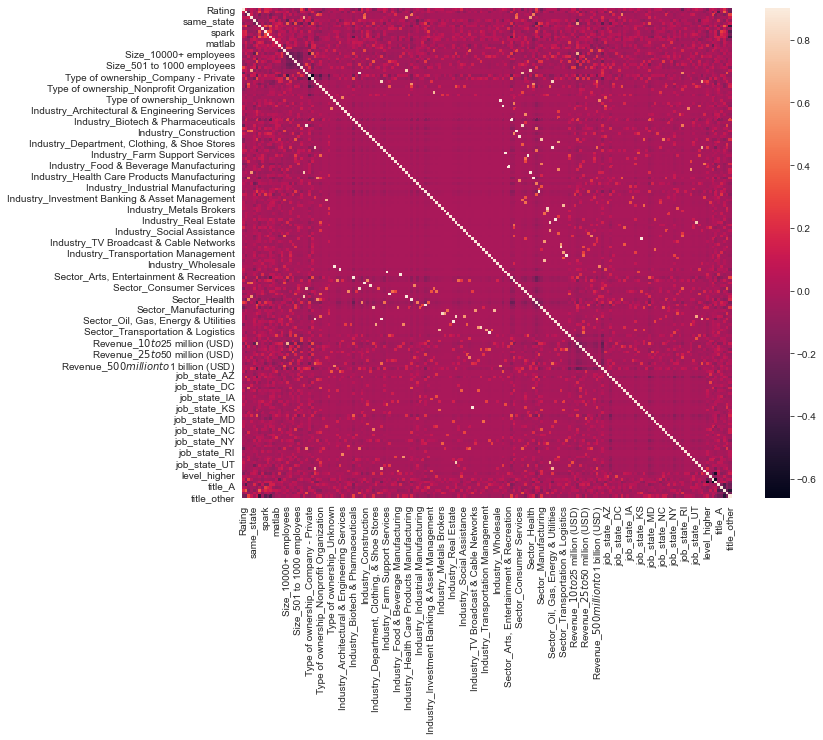

In [9]:
#heatmap
corrmat = data.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

In [10]:
#dividing dataset into dependent and independent variables
X = data.drop(["avg_salary"], axis=1)
y = data.avg_salary

In [11]:
train, test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123)

In [12]:
X_sm= X = sm.add_constant(X)
model= sm.OLS(y,X_sm)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             avg_salary   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     6.122
Date:                Sun, 21 Jun 2020   Prob (F-statistic):           1.03e-56
Time:                        18:02:06   Log-Likelihood:                -3254.8
No. Observations:                 741   AIC:                             6798.
Df Residuals:                     597   BIC:                             7461.
Df Model:                         143                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                                44.7452      4.349     10.288      0.000      36.203      53.287
Rating                                               20.7080      6.478      3.197      0.001       7.985      33.431
hourly                                              -25.2348      8.674     -2.909      0.004     -42.270      -8.200
employer_provided                                    13.1996     10.537      1.253      0.211      -7.495      33.894
same_state                                            3.9069      2.489      1.570      0.117      -0.981       8.794
age                                                   0.6423      7.875      0.082      0.935     -14.825      16.109
python                                                4.9990      2.523      1.981      0.048       0.043       9.955
sas                                                   4.0531      3.099      1.308      0.191      -2.034      10.140
spark                                                 0.7925      2.697      0.294      0.769      -4.504       6.089
aws                                                   5.9842      2.536      2.359      0.019       1.003      10.965
sql                                                  -4.3505      2.384     -1.825      0.069      -9.033       0.332
excel                                                -5.6507      2.106     -2.683      0.008      -9.788      -1.514
matlab                                               12.6146      4.081      3.091      0.002       4.600      20.629
desc_len                                             -1.1416      7.018     -0.163      0.871     -14.924      12.641
comp                                                  2.2364      0.820      2.726      0.007       0.625       3.848
Size_1 to 50 employees                                7.0393      5.882      1.197      0.232      -4.512      18.591
Size_10000+ employees                                -0.2113      5.156     -0.041      0.967     -10.338       9.915
Size_1001 to 5000 employees                           5.7201      3.341      1.712      0.087      -0.842      12.282
Size_201 to 500 employees                             2.4156      3.346      0.722      0.471      -4.156       8.987
Size_5001 to 10000 employees                         -0.2832      4.893     -0.058      0.954      -9.893       9.326
Size_501 to 1000 employees                           -1.0032      3.502     -0.286      0.775      -7.881       5.875
Size_51 to 200 employees                              4.3654      3.819      1.143      0.253      -3.135      11.866
Size_Unknown                                         26.7024     13.440      1.987      0.047       0.306      53.098
Type of ownersh

In [13]:
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [14]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))


In [15]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))


In [16]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)


In [17]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [18]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [19]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [20]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 25.8666 (1.4640)



In [21]:
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 25.7505 (1.3523)



In [22]:
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 23.7950 (0.8908)



In [23]:
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Xgboost score: 20.1860 (1.6271)



In [24]:
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

LGBM score: 21.1951 (1.4845)



In [25]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [26]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   

In [27]:
averaged_models = AveragingModels(models = (ENet, GBoost, KRR, lasso))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 22.0761 (1.2727)



In [28]:
averaged_models.fit(train.values, y_train)
avg_train_pred = averaged_models.predict(train.values)
avg_pred = averaged_models.predict(test.values)
print(rmsle(y_train, avg_train_pred))

15.8000846254686


In [29]:
model_xgb.fit(train, y_train)
xgb_train_pred = model_xgb.predict(train)
xgb_pred = model_xgb.predict(test)
print(rmsle(y_train, xgb_train_pred))

3.485979767839435


In [30]:
model_lgb.fit(train, y_train)
lgb_train_pred = model_lgb.predict(train)
lgb_pred = model_lgb.predict(test.values)
print(rmsle(y_train, lgb_train_pred))

13.161984476366882


In [31]:
parameters={'n_estimators':range(10,300,10),'criterion':('mse','mae'),'max_features':('auto','sqrt','log2')}

In [32]:
rf=RandomForestRegressor()
gs=GridSearchCV(rf,parameters,scoring='neg_mean_absolute_error', cv=3)
gs.fit(train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [33]:
gs.best_score_

-14.674454499877513

In [34]:
gs.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [35]:
pred_rf=gs.best_estimator_.predict(test)

In [36]:
mean_absolute_error(y_test,pred_rf)

12.639597315436239

In [37]:
ensemble= xgb_pred*0.70 + pred_rf*0.30 


In [38]:
mean_absolute_error(y_test,ensemble)

10.96214848460767